# Snake Classifier
> How to create a neural network model that decides between Coral Snake and Kingsnake.

- categories: [programming, fastai]
- comments: true

## Objective
Create a neural network model that's capable of deciding between two snake categories. 

Using [chapter 2](https://github.com/fastai/fastbook/blob/master/02_production.ipynb) from [The fastai book](https://github.com/fastai/fastbook) as a guide. Follow the chapter for more detailed explanations.

Code cells are licensed under [GNU General Public License v3.0](https://github.com/jac08h/blog/blob/master/code_cells_license/LICENSE).

In [1]:
from fastbook import *
from fastai.vision.widgets import *

In [2]:
key = 'XXX'  # bing image search key
snake_types = 'kingsnake', 'coral snake'
path = Path('snakes')

Download 150 images of each snake category to corresponding folders.

In [3]:
if not path.exists():
    path.mkdir()
for snake_type in snake_types:
    dest = (path/snake_type)
    dest.mkdir(exist_ok=True)
    results = search_images_bing(key, f'{snake_type}')
    download_images(dest, urls=results.attrgot('content_url'))


 Download of http://thenaturaltraveller.files.wordpress.com/2014/01/img_9112.jpg has failed after 5 retries
 Fix the download manually:
$ mkdir -p snakes/coral snake
$ cd snakes/coral snake
$ wget -c http://thenaturaltraveller.files.wordpress.com/2014/01/img_9112.jpg
$ tar xf img_9112.jpg
 And re-run your code once the download is successful



In [5]:
fns = get_image_files(path)

Remove images that can't be opened.

In [9]:
failed = verify_images(fns)
failed.map(Path.unlink);

Create a DataBlock. Split the images to train (80%) and validation set (20%). Create synthetic images by augmenting the original data using aug_transforms.

In [10]:
snakes = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter = RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms(mult=2)
)

In [11]:
dls = snakes.dataloaders(path)

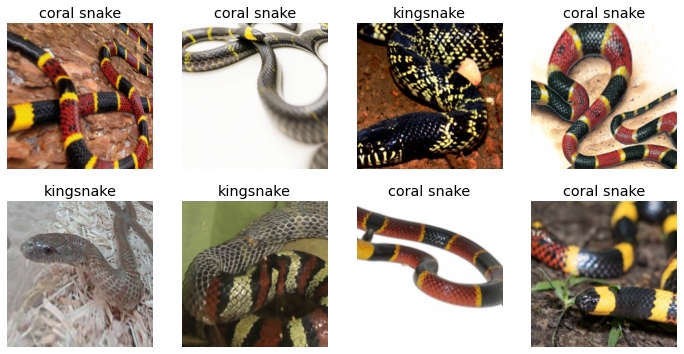

In [12]:
dls.train.show_batch(max_n=8, nrows=2, unique=False)

Train the model.

Using pre-trained model resnet18 as a starting point, then fine-tuning it to the snakes problem.

In [29]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.324692,0.415803,0.172414,00:05


epoch,train_loss,valid_loss,error_rate,time
0,0.603712,0.305789,0.068965,00:05
1,0.562530,0.206492,0.103448,00:05
2,0.509871,0.188923,0.051724,00:06
3,0.483981,0.185373,0.068965,00:05


The error rate stabilizes at around 6%.

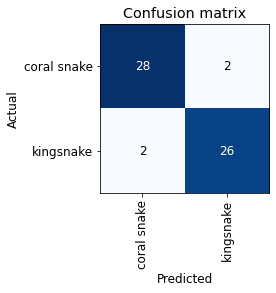

In [30]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

Export the model.

In [31]:
learn.export()

In [32]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

You can [find out](https://mybinder.org/v2/gh/jac08h/SnakeClassifier/master?urlpath=%2Fvoila%2Frender%2Fsnake_classifier.ipynb) how the model performes on your images on this. The code to setup the web interface is hosted [here](https://github.com/jac08h/SnakeClassifier).

## Conclusion
With no more than 150 pictures of a snake of one kind, using pre-trained model with data augmentation of the original pictures, and not doing any tweaking of the parameters, the model achieves accuracy higher than 90%. 

I'd like to emphasize the fact that the way we managed this is by showing the model bunch of *labeled images*. That's it. We didn't code any significant features of the snake kinds, like colors or size of the eyes. Fascinating, isn't it?